In [2]:

from FeatureExtractor import get_data
from plotutils import model_history,c_report,plot_confusion_matrix
import numpy as np
from tensorflow import keras
import sklearn
from keras.models import  Model
from keras.layers import *
from keras.regularizers import *
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from keras.callbacks import *
import numpy as np
import pandas as pd

In [3]:
# read data and call get_data function to get splits of data
emodb_data = pd.read_csv('E:/Emodb.csv')

In [4]:
emodb_data

,uuid,speaker,sentence,letter,labels,suffix,path,patz,paths
0,03a01Fa,3,a01,F,happy,a,E:\Emodb\wav,E:\Emodb\wav\03a01Fa,E:\Emodb\wav\03a01Fa.wav
1,03a01Nc,3,a01,N,neutral,c,E:\Emodb\wav,E:\Emodb\wav\03a01Nc,E:\Emodb\wav\03a01Nc.wav
2,03a01Wa,3,a01,W,angry,a,E:\Emodb\wav,E:\Emodb\wav\03a01Wa,E:\Emodb\wav\03a01Wa.wav
3,03a02Fc,3,a02,F,happy,c,E:\Emodb\wav,E:\Emodb\wav\03a02Fc,E:\Emodb\wav\03a02Fc.wav
4,03a02Nc,3,a02,N,neutral,c,E:\Emodb\wav,E:\Emodb\wav\03a02Nc,E:\Emodb\wav\03a02Nc.wav
...,...,...,...,...,...,...,...,...,...
530,16b10Lb,16,b10,L,boring,b,E:\Emodb\wav,E:\Emodb\wav\16b10Lb,E:\Emodb\wav\16b10Lb.wav
531,16b10Tb,16,b10,T,sad,b,E:\Emodb\wav,E:\Emodb\wav\16b10Tb,E:\Emodb\wav\16b10Tb.wav
532,16b10Td,16,b10,T,sad,d,E:\Emodb\wav,E:\Emodb\wav\16b10Td,E:\Emodb\wav\16b10Td.wav
533,16b10Wa,16,b10,W,angry,a,E:\Emodb\wav,E:\Emodb\wav\16b10Wa,E:\Emodb\wav\16b10Wa.wav


In [5]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
z=label.fit_transform(emodb_data['labels'])
z

array([4, 5, 1, 4, 5, 6, 1, 1, 0, 4, 2, 5, 6, 1, 0, 4, 5, 6, 1, 1, 4, 4,
       2, 5, 1, 4, 2, 5, 6, 1, 1, 0, 2, 5, 6, 1, 5, 6, 1, 2, 5, 6, 1, 0,
       3, 5, 5, 1, 1, 0, 4, 2, 5, 1, 1, 0, 0, 4, 2, 5, 6, 1, 4, 2, 5, 6,
       1, 4, 2, 5, 6, 1, 4, 2, 5, 6, 6, 1, 0, 4, 4, 2, 5, 1, 4, 2, 5, 6,
       1, 4, 2, 5, 6, 1, 0, 4, 2, 5, 6, 1, 1, 0, 4, 2, 5, 6, 1, 3, 4, 5,
       1, 3, 3, 2, 1, 4, 2, 5, 1, 3, 2, 5, 6, 1, 1, 3, 5, 6, 1, 1, 3, 5,
       1, 5, 6, 1, 1, 3, 4, 4, 2, 5, 6, 1, 3, 5, 1, 0, 5, 1, 0, 5, 1, 0,
       4, 2, 5, 1, 4, 5, 1, 1, 0, 2, 6, 1, 0, 0, 2, 6, 1, 0, 3, 4, 2, 0,
       2, 5, 1, 2, 6, 1, 0, 2, 1, 4, 2, 1, 0, 0, 2, 5, 1, 3, 4, 2, 5, 6,
       1, 0, 4, 5, 1, 0, 4, 4, 2, 5, 6, 1, 0, 2, 6, 1, 0, 3, 4, 2, 5, 1,
       0, 4, 5, 6, 1, 4, 2, 5, 6, 1, 1, 0, 4, 2, 5, 6, 1, 0, 0, 2, 5, 6,
       1, 4, 2, 5, 1, 0, 3, 5, 1, 1, 1, 0, 2, 5, 6, 1, 0, 2, 1, 6, 1, 0,
       3, 4, 5, 1, 1, 1, 2, 6, 0, 6, 1, 0, 2, 1, 0, 3, 3, 4, 2, 5, 1, 0,
       3, 4, 2, 5, 6, 1, 0, 4, 2, 6, 1, 0, 3, 2, 5,

In [6]:
emodb_data['labels']=z
emodb_data

,uuid,speaker,sentence,letter,labels,suffix,path,patz,paths
0,03a01Fa,3,a01,F,4,a,E:\Emodb\wav,E:\Emodb\wav\03a01Fa,E:\Emodb\wav\03a01Fa.wav
1,03a01Nc,3,a01,N,5,c,E:\Emodb\wav,E:\Emodb\wav\03a01Nc,E:\Emodb\wav\03a01Nc.wav
2,03a01Wa,3,a01,W,1,a,E:\Emodb\wav,E:\Emodb\wav\03a01Wa,E:\Emodb\wav\03a01Wa.wav
3,03a02Fc,3,a02,F,4,c,E:\Emodb\wav,E:\Emodb\wav\03a02Fc,E:\Emodb\wav\03a02Fc.wav
4,03a02Nc,3,a02,N,5,c,E:\Emodb\wav,E:\Emodb\wav\03a02Nc,E:\Emodb\wav\03a02Nc.wav
...,...,...,...,...,...,...,...,...,...
530,16b10Lb,16,b10,L,2,b,E:\Emodb\wav,E:\Emodb\wav\16b10Lb,E:\Emodb\wav\16b10Lb.wav
531,16b10Tb,16,b10,T,6,b,E:\Emodb\wav,E:\Emodb\wav\16b10Tb,E:\Emodb\wav\16b10Tb.wav
532,16b10Td,16,b10,T,6,d,E:\Emodb\wav,E:\Emodb\wav\16b10Td,E:\Emodb\wav\16b10Td.wav
533,16b10Wa,16,b10,W,1,a,E:\Emodb\wav,E:\Emodb\wav\16b10Wa,E:\Emodb\wav\16b10Wa.wav


In [7]:
emodb_data["labels"].unique()

array([4, 5, 1, 6, 0, 2, 3])

In [8]:
import numpy as np
import librosa
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# This file can be used for noth 7 classes and 4 classes you need to keep in mind that 
# file will be edited for 4 classes by using the code givvenn below
emodb_data = pd.read_csv('E:/Emodb.csv')
emodb_data.head()

# for 4 classes
# below array is equivalent to [0,1,2,3,4,5,6] as in emodb_data dataframe
# labels = ['happy', 'neutral', 'angry', 'sad', 'fear', 'bored', 'disgust']
# emodb_data.drop(emodb_data.index[emodb_data['labels'] == 4], inplace=True)
# emodb_data.drop(emodb_data.index[emodb_data['labels'] == 5], inplace=True)
# emodb_data.drop(emodb_data.index[emodb_data['labels'] == 6], inplace=True)

def get_data(flatten=False, feature=1, mfcc_len=39, mslen = 35000, n_fft=512, hop_length=128):
    """
    Read the files get the data perform the test-train split and return them to the caller
    :param mfcc_len: Number of mfcc features to take for each frame
    :param flatten: Boolean specifying whether to flatten the data or not
    :return: 4 arrays, x_train x_test y_train y_test
    """

    from sklearn.preprocessing import LabelEncoder
    label=LabelEncoder()
    z=label.fit_transform(emodb_data['labels'])
    emodb_data['labels']=z
    emodb_data.drop(emodb_data.index[emodb_data['labels'] == 4], inplace=True)
    emodb_data.drop(emodb_data.index[emodb_data['labels'] == 5], inplace=True)
    emodb_data.drop(emodb_data.index[emodb_data['labels'] == 6], inplace=True)

    data = []
    labels = np.array(emodb_data.labels)
    # obtain labels directly from data frame
    
    fea=[]
    max_fs = 0
    min_sample = int('9' * 10)
    cnt = 0
    # for paths in dataframe's column paths
    for path in emodb_data.paths:
        # load the audio
        signal,fs = librosa.core.load(path,sr=16000)
        max_fs = max(max_fs, fs)
        s_len = len(signal)
        # pad the signals to have same size if lesser than required
        if s_len < mslen:
            pad_len = int(mslen - s_len)
            pad_rem = int(pad_len % 2)
            pad_len /= 2
            signal = np.pad(signal, (int(pad_len), int(pad_len + pad_rem)), 'constant', constant_values=0)
        # else slice them
        else:
            pad_len = int(s_len - mslen)
            pad_rem = pad_len % 2
            pad_len /= 2
            signal = signal[int(pad_len):int(pad_len + mslen)]
            min_sample = min(len(signal), min_sample)
        
        # Extract Mel Spectrogram features
        if feature==1:
            melspecfea = librosa.feature.melspectrogram(y=signal, sr=fs,n_fft=n_fft, hop_length=hop_length)
            melspecfea = librosa.power_to_db(melspecfea,ref=np.max)
            fea = (melspecfea- np.min(melspecfea))/np.ptp(melspecfea)
        
        # Extract Mfcc, delta, delta-delta features
        if feature==2:
            melspecfea = librosa.feature.melspectrogram(y=signal, sr=fs,n_fft=n_fft, hop_length=hop_length)
            mfcc = librosa.feature.mfcc(S=melspecfea, n_mfcc=20)
            mfcc_delta = librosa.feature.delta(mfcc)
            mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
            mfcc_all= np.vstack((mfcc,mfcc_delta,mfcc_delta2))
            fea = (mfcc_all- np.min(mfcc_all))/np.ptp(mfcc_all)
        
        # Extract Spectrogram features    
        if feature==3:
            spectrogram1 = librosa.core.stft(signal, n_fft=512)
            spectrogram1 = np.abs(spectrogram1)
            fea = (spectrogram1- np.min(spectrogram1))/np.ptp(spectrogram1)
      
        if flatten:
          # Flatten the data
          fea = fea.flatten()
        data.append(fea)
        cnt += 1
    # train test split on data  
    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)
    return np.array(x_train),np.array(y_train),np.array(x_test),np.array(y_test)

In [9]:
# for 4 classes do some changes in feature extarctor file
X_train, Y_train, X_test, Y_test = get_data()

In [10]:
Y_train

array([3, 1, 1, 3, 1, 0, 2, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 3, 1, 1, 0, 2,
       1, 2, 0, 1, 1, 0, 3, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 3, 1, 3, 0, 0, 2, 1, 0, 2, 2, 3, 1, 1, 2,
       2, 2, 1, 0, 1, 1, 1, 3, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 2, 2,
       1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 3, 3, 0, 1, 2, 2, 2, 0, 3, 1, 1, 2,
       2, 2, 3, 0, 0, 3, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1,
       0, 0, 1, 1, 3, 0, 1, 0, 2, 2, 3, 0, 3, 1, 2, 1, 1, 0, 3, 2, 1, 1,
       0, 0, 1, 2, 1, 3, 1, 0, 3, 2, 3, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1,
       3, 0, 2, 3, 0, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 2, 3, 3, 1, 1, 2, 3,
       2, 2, 2, 3, 3, 2, 2, 0, 1, 2, 1, 3, 1, 0, 1, 1, 0, 3, 1, 0, 0, 1,
       3, 1, 2, 2, 1, 3, 1, 1, 1, 1, 0, 3, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0,
       0, 2, 2, 0, 1, 3, 2, 1, 1, 0, 1, 0, 1, 2, 3, 2, 3, 2, 3, 1, 1, 3,
       1, 2, 1, 2, 1, 3, 1, 1, 3, 1, 0, 1, 1, 2, 3, 1, 1, 0, 3, 1, 0, 2,
       3, 0, 1, 1])

In [11]:
Y_train = keras.utils.to_categorical(Y_train,7)
Y_test = keras.utils.to_categorical(Y_test,7)

In [12]:
Y=np.array(emodb_data.labels)
from sklearn.utils.class_weight import compute_class_weight
weight = compute_class_weight(class_weight='balanced', classes=np.unique(Y), y=Y)
weight = {i : weight[i] for i in range(4)}

In [13]:
input1 = Input(shape=(X_train.shape[1], X_train.shape[2], 1))
flat1=Flatten()(input1)
dense1=Dense(1024,activation="relu",kernel_regularizer=l1(0.0001))(flat1)
batch1=BatchNormalization()(dense1)
dropout1=Dropout(0.5)(batch1)
dense2=Dense(1024,activation="relu",kernel_regularizer=l1(0.0001))(dropout1)
batch2=BatchNormalization()(dense2)
dropout2=Dropout(0.5)(batch2)

den1 = Dense(64, activation='relu',kernel_regularizer=l2(0.002))(dropout2)
den2 = Dense(7, activation='softmax')(den1)

In [14]:
model= Model(inputs=input1,outputs=den2)

# Early stopping callback tracking val_loss
stop_early = EarlyStopping(monitor='val_loss', mode='min',
                           verbose=1, patience=150)

In [15]:
# Model Checkpoint callback tracking val_accuracy
checkpoint = ModelCheckpoint(
    'model2.h5', 
    monitor = 'val_accuracy', 
    verbose = 1, 
    save_best_only = True
)

In [16]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
model

In [21]:
history = model.fit(X_train, Y_train, validation_split=0.25, class_weight = weight, batch_size=32,epochs = 150,callbacks=[checkpoint,stop_early])

Epoch 1/150
7/7 [==============================] - ETA: 0s - loss: 9.2831 - accuracy: 0.9401
Epoch 1: val_accuracy did not improve from 0.60274
7/7 [==============================] - 3s 384ms/step - loss: 9.2831 - accuracy: 0.9401 - val_loss: 13.9974 - val_accuracy: 0.3288
Epoch 2/150
7/7 [==============================] - ETA: 0s - loss: 9.0985 - accuracy: 0.9355
Epoch 2: val_accuracy did not improve from 0.60274
7/7 [==============================] - 3s 379ms/step - loss: 9.0985 - accuracy: 0.9355 - val_loss: 12.7932 - val_accuracy: 0.3151
Epoch 3/150
7/7 [==============================] - ETA: 0s - loss: 8.9781 - accuracy: 0.9171
Epoch 3: val_accuracy did not improve from 0.60274
7/7 [==============================] - 3s 379ms/step - loss: 8.9781 - accuracy: 0.9171 - val_loss: 13.6979 - val_accuracy: 0.3288
Epoch 4/150
7/7 [==============================] - ETA: 0s - loss: 8.7993 - accuracy: 0.9309
Epoch 4: val_accuracy did not improve from 0.60274
7/7 [=============================

In [22]:
predict = model.predict(X_test)
loss, accu = model.evaluate(X_test,Y_test,verbose=1)
labels_pred = np.argmax(predict, axis = -1)    
labels_true = np.argmax(Y_test, axis = -1)

2/2 [==============================] - 0s 68ms/step - loss: 12.0163 - accuracy: 0.5455


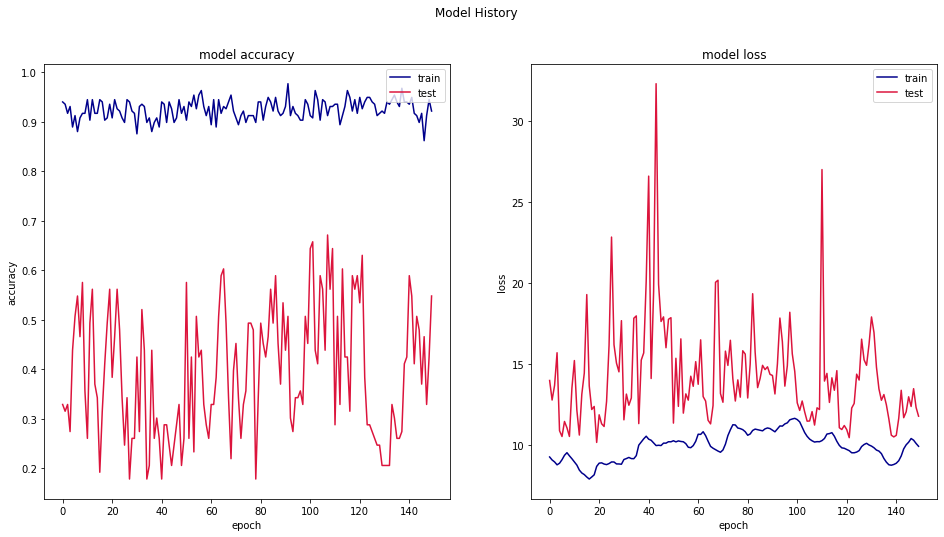

In [23]:
model_history(history)

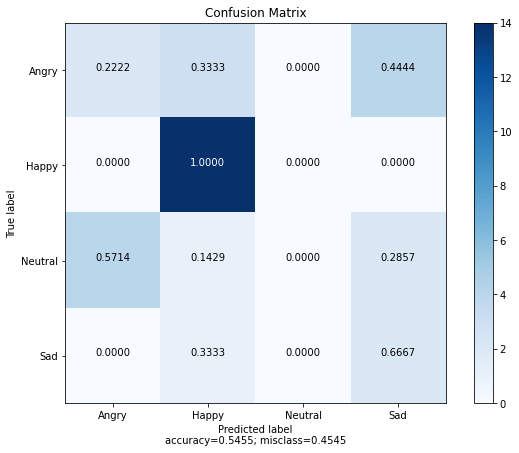

In [24]:
plot_confusion_matrix(cm = confusion_matrix(labels_true, labels_pred),normalize = True,
                    target_names = ['Angry','Happy', 'Neutral', 'Sad'],title = "Confusion Matrix")


In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 274, 1)]     0         
                                                                 
 flatten (Flatten)           (None, 35072)             0         
                                                                 
 dense (Dense)               (None, 1024)              35914752  
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                             